In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
df = pd.read_csv("../../DataScience/PhiladelphiaCrime/dataset/crime.csv")
df.head()

,Dc_Dist,Psa,Dispatch_Date_Time,Dispatch_Date,Dispatch_Time,Hour,Dc_Key,Location_Block,UCR_General,Text_General_Code,Police_Districts,Month,Lon,Lat
0,18,3,2009-10-02 14:24:00,2009-10-02,14:24:00,14,200918067518,S 38TH ST / MARKETUT ST,800.0,Other Assaults,NaN,2009-10,NaN,NaN
1,14,1,2009-05-10 00:55:00,2009-05-10,00:55:00,0,200914033994,8500 BLOCK MITCH,2600.0,All Other Offenses,NaN,2009-05,NaN,NaN
2,25,J,2009-08-07 15:40:00,2009-08-07,15:40:00,15,200925083199,6TH CAMBRIA,800.0,Other Assaults,NaN,2009-08,NaN,NaN
3,35,D,2009-07-19 01:09:00,2009-07-19,01:09:00,1,200935061008,5500 BLOCK N 5TH ST,1500.0,Weapon Violations,20.0,2009-07,-75.130477,40.036389
4,9,R,2009-06-25 00:14:00,2009-06-25,00:14:00,0,200909030511,1800 BLOCK WYLIE ST,2600.0,All Other Offenses,8.0,2009-06,-75.166350,39.969532


In [3]:
df = df.drop(axis=1, labels=['Dc_Dist', 'Psa', 'Dc_Key', 'Location_Block', 'Lon', 'Lat'])
df.head()

,Dispatch_Date_Time,Dispatch_Date,Dispatch_Time,Hour,UCR_General,Text_General_Code,Police_Districts,Month
0,2009-10-02 14:24:00,2009-10-02,14:24:00,14,800.0,Other Assaults,NaN,2009-10
1,2009-05-10 00:55:00,2009-05-10,00:55:00,0,2600.0,All Other Offenses,NaN,2009-05
2,2009-08-07 15:40:00,2009-08-07,15:40:00,15,800.0,Other Assaults,NaN,2009-08
3,2009-07-19 01:09:00,2009-07-19,01:09:00,1,1500.0,Weapon Violations,20.0,2009-07
4,2009-06-25 00:14:00,2009-06-25,00:14:00,0,2600.0,All Other Offenses,8.0,2009-06


### Convert Year-Month to datetime (needed for plot_date) using pd.to_datetime()

In [4]:
# Copy data frame
df1 = df.copy()
# Convert Month to datetime Month (needed for plot_date)
df1['Month'] = pd.to_datetime(df1.Month)

In [5]:
# Extract year and month out of it
df1['year'] = df1.Month.dt.year
df1['month'] = df1.Month.dt.month
# Count the number of crimes per (year, month)
counts_per_month1 = df1.groupby(['year', 'month'])['month'].count()
# Convert group to data frame
counts_per_month_df1 = counts_per_month1.to_frame(name='count').reset_index()
counts_per_month_df1.head()

,year,month,count
0,2006,1,19359
1,2006,2,15894
2,2006,3,18627
3,2006,4,18940
4,2006,5,20041


In [6]:
df1.head()

,Dispatch_Date_Time,Dispatch_Date,Dispatch_Time,Hour,UCR_General,Text_General_Code,Police_Districts,Month,year,month
0,2009-10-02 14:24:00,2009-10-02,14:24:00,14,800.0,Other Assaults,NaN,2009-10-01,2009,10
1,2009-05-10 00:55:00,2009-05-10,00:55:00,0,2600.0,All Other Offenses,NaN,2009-05-01,2009,5
2,2009-08-07 15:40:00,2009-08-07,15:40:00,15,800.0,Other Assaults,NaN,2009-08-01,2009,8
3,2009-07-19 01:09:00,2009-07-19,01:09:00,1,1500.0,Weapon Violations,20.0,2009-07-01,2009,7
4,2009-06-25 00:14:00,2009-06-25,00:14:00,0,2600.0,All Other Offenses,8.0,2009-06-01,2009,6


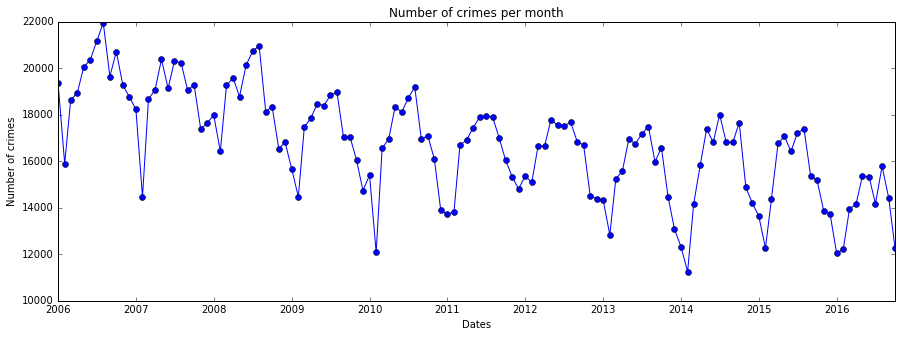

In [7]:
# Display number of crimes per month
fig, ax = plt.subplots(figsize=(15,5))
ax.plot_date(np.sort(df1.Month.unique()), counts_per_month_df1['count'], '-o')
ax.set_ylabel('Number of crimes')
ax.set_xlabel('Dates')
ax.set_title('Number of crimes per month')

### Alternative: Convert Year-Month to datetime using apply() + strptime()

In [8]:
# Copy data frame for alternative solution
df2 = df.copy()
# Convert Month to datetime Month using apply() + strptime()
df2['Month'] = df2['Month'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m'))

In [9]:
# Extract year and month out of it
df2['year'] = df2.Month.dt.year
df2['month'] = df2.Month.dt.month
# Count the number of crimes per (year, month)
counts_per_month2 = df2.groupby(['year', 'month'])['month'].count()
# Convert group to data frame
counts_per_month_df2 = counts_per_month2.to_frame(name='count').reset_index()
counts_per_month_df2.head()

,year,month,count
0,2006,1,19359
1,2006,2,15894
2,2006,3,18627
3,2006,4,18940
4,2006,5,20041


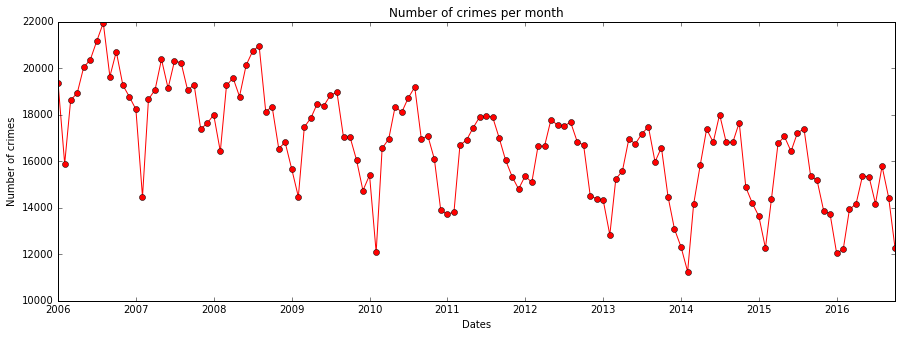

In [10]:
# Display number of crimes per month
fig, ax = plt.subplots(figsize=(15,5))
ax.plot_date(np.sort(df2.Month.unique()), counts_per_month_df2['count'], 'r-o')
ax.set_ylabel('Number of crimes')
ax.set_xlabel('Dates')
ax.set_title('Number of crimes per month')

## Create Time Series

In [16]:
timeseries = pd.Series(data=counts_per_month_df1['count'])
timeseries.head()

0    19359
1    15894
2    18627
3    18940
4    20041
Name: count, dtype: int64

## Create rolling mean and std

In [21]:
roll_mean = timeseries.rolling(window=12).mean()
roll_std = timeseries.rolling(window=12).std()

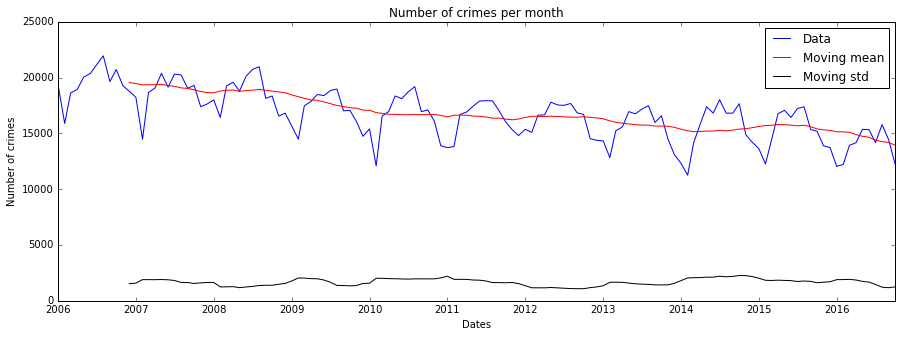

In [23]:
# Display number of crimes per month
plt.clf()
fig, ax = plt.subplots(figsize=(15,5))
plt.plot_date(np.sort(df2.Month.unique()), timeseries, 'b', label='Data')
plt.plot_date(np.sort(df2.Month.unique()), roll_mean, 'r', label='Moving mean')
plt.plot_date(np.sort(df2.Month.unique()), roll_std, 'k', label='Moving std')
plt.ylabel('Number of crimes')
plt.xlabel('Dates')
plt.legend()
plt.title('Number of crimes per month')